<a href="https://colab.research.google.com/github/tsuwannasin13/Covid-19/blob/master/%5BAssignment_2_Covid_19_Dataset%5D%E0%B8%98%E0%B8%B5%E0%B8%A3%E0%B8%A7%E0%B8%B1%E0%B8%92%E0%B8%99%E0%B9%8C_%E0%B8%AA%E0%B8%B8%E0%B8%A7%E0%B8%A3%E0%B8%A3%E0%B8%93%E0%B8%AA%E0%B8%B4%E0%B8%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSSE COVID-19 Dataset

##เป็นข้อมูลสรุปรายงานการติดเชื้อ COVID-19 จากทั่วโลกตั้งแต่วันที่ 22 มกราคม 2020 ถึง 12 มีนาคม 2020


ประกอบด้วยไฟล์

*   time_series_covid19_confirmed_global.csv
*   time_series_covid19_deaths_global.csv
*   time_series_covid19_recovered_global.csv

##Field description
* **Province/State**: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* **Country/Region**: country/region name conforming to WHO (will be updated).
* **Confirmed**: the number of confirmed cases(accumulated).
* **Deaths**: the number of deaths(accumulated).
* **Recovered**: the number of recovered cases(accumulated).

**จากไฟล์จงทำการเขียนโปรแกรมเพื่อตอบคำถามต่อไปนี้**
1.   จงแสดงอัตราการรักษาหายของเฉพาะผู้ป่วยในสหภาพยุโรปเป็นเปอร์เซ็นต์
2.   จงหา Country/Region ที่มียอดจำนวนผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับพร้อมพล็อตกราฟแสดงจำนวนผู้ติดเชื้อของแต่ละ Country/Region โดยเรียงลำดับจากมากไปน้อย (ไม่ต้องแยกเป็น Province/State)
3.   จงพล็อตกราฟเส้นเพื่อแสดง trend ยอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์(กำหนดให้นับข้อมูลทุกวันอาทิตย์)
4.   จงหายอดผู้ติดเชื้อของ**แต่ละวัน**บนเรือไดม่อนพริ้นเซสพร้อมพล็อตกราฟ แล้วระบุวันที่มีการติดเชื้อมากที่สุด
5.   จงหา Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ พร้อมระบุว่า จาก Country/Region ในกลุ่มดังกล่าว ส่วนใหญ่อยู่ในทวีปอะไร
6.   จงหายอดผู้ป่วยที่กำลังรักษาตัวล่าสุด (สมมติว่ายังไม่เสียชีวิตหรือหายดี) ของแต่ละ Province/State ในประเทศจีน พร้อมพล็อตกราฟแสดงจำนวนในแต่ละ Province/State

##1.   จงแสดงอัตราการรักษาหายของเฉพาะผู้ป่วยในสหภาพยุโรปเป็นเปอร์เซ็นต์

In [4]:
#Solution
import pandas as pd

#อ่านไฟล์
confirmed = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_confirmed_global.csv')
recovered = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_recovered_global.csv')

#รวมผลรวมติดเชื้อ และรักษาหาย
groupby_confirmed1 = confirmed.groupby(['Country/Region']).agg('sum') 
groupby_recovered1 = recovered.groupby(['Country/Region']).agg('sum')

#หา % อัตราการรักษาหาย = จำนวนรักษาหาย / จำนวนติดเชื้อ * 100
recovery_rate =groupby_recovered1 / groupby_confirmed1 *100
recovery_rate.drop(['Lat', 'Long'], 1, inplace=True) 

#สลับคอลัมน์และแถว
r1 = recovery_rate.T

#หาอัตราการรักษาหายของเฉพาะผู้ป่วยในสหภาพยุโรปเป็นเปอร์เซ็นต์
r2 = r1[['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark','Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']]
r2.T

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.526718,2.197802,1.626016,1.324503,1.190476,0.916031,0.697674,0.589391,0.075075,0.546780,0.447094,0.376884,0.319829,0.251256,0.201162,0.170358,0.161059,1.621074,2.938488,2.720348,5.450614,6.612601,10.756385,13.406778,15.715698,17.545991,21.280027,24.877604,28.161340,32.012026,34.863236,39.565086,44.736260,47.834275,50.103980
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,50.000000,...,4.347826,2.000000,0.917431,0.591716,0.500000,0.418410,0.374532,0.318471,0.318471,0.178891,0.145138,0.112867,0.094518,0.080451,2.086137,1.727019,0.044307,9.342806,7.733020,7.026449,10.798782,11.079603,10.825982,11.779242,11.637837,12.541528,12.833011,13.275930,15.267832,16.256190,17.125820,17.617058,19.049312,19.150572,18.730287,20.001709,20.670056,20.879739,21.364837,21.799845
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.840491,1.604278,1.492537,1.376147,1.652893,3.030303,3.071672,3.323263,4.046243,4.735376,4.260652,4.739336,5.470460,6.185567,6.759443,6.967985,7.103825,7.279029,7.082631,7.766990,8.503937,9.379728,10.074074
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.125000,2.631579,2.040816,3.508772,6.153846,4.938272,4.761905,3.906250,2.427184,1.968504,1.587302,1.308901,4.977376,4.444444,6.313993,6.849315,7.293128,8.481013,7.727797,7.580478,8.704253,8.526413,10.568384,10.575296,10.638298,13.026521,13.328369,15.565032,15.451505,21.056063,23.312500
Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.157895,2.586207,2.419355,2.272727,2.739726,9.259259,8.379888,7.009346,9.565217,8.778626,8.750000,7.865169,7.070707,7.746479,8.295964,9.677419,9.514170,9.885932,9.397163,9.747899,9.902597,10.268562
Czechia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.006711,0.757576,0.646552,0.432277,0.480192,0.603015,0.535714,0.485437,0.717360,0.604595,0.519481,0.482668,0.418092,0.390486,0.833056,1.360339,1.738883,1.736

##2.   จงหา Country/Region ที่มียอดจำนวนผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับพร้อมพล็อตกราฟแสดงจำนวนผู้ติดเชื้อของแต่ละ Country/Region โดยเรียงลำดับจากมากไปน้อย (ไม่ต้องแยกเป็น Province/State)

In [7]:
#Solution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#อ่านไฟล์
confirmed = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_confirmed_global.csv')

#หาจำนวน Country/Region ผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับ
confirmed_top10 = confirmed.nlargest(10, '4/12/20')
print(confirmed_top10)

confirmed_top10.drop(['Province/State', 'Lat', 'Long'], 1, inplace=True) 
df = confirmed_top10.T
df.columns = ['US', 'Spain', 'Italy', 'France', 'Germany','United Kingdom','Iran','China','Turkey','Belgium']
df1 =  df.T.drop('Country/Region', axis=1).T
df1.index.names = ['Date']
df1

    Province/State  Country/Region      Lat  ...  4/10/20  4/11/20  4/12/20
225            NaN              US  37.0902  ...   496535   526396   555313
201            NaN           Spain  40.0000  ...   158273   163027   166831
137            NaN           Italy  43.0000  ...   147577   152271   156363
116            NaN          France  46.2276  ...   124869   129654   132591
120            NaN         Germany  51.0000  ...   122171   124908   127854
223            NaN  United Kingdom  55.3781  ...    73758    78991    84279
133            NaN            Iran  32.0000  ...    68192    70029    71686
62           Hubei           China  30.9756  ...    67803    67803    67803
213            NaN          Turkey  38.9637  ...    47029    52167    56956
23             NaN         Belgium  50.8333  ...    26667    28018    29647

[10 rows x 86 columns]


,US,Spain,Italy,France,Germany,United Kingdom,Iran,China,Turkey,Belgium
Date,,,,,,,,,,
1/22/20,1,0,0,0,0,0,0,444,0,0
1/23/20,1,0,0,0,0,0,0,444,0,0
1/24/20,2,0,0,2,0,0,0,549,0,0
1/25/20,2,0,0,3,0,0,0,761,0,0
1/26/20,5,0,0,3,0,0,0,1058,0,0
...,...,...,...,...,...,...,...,...,...,...
4/8/20,429052,148220,139422,112950,113296,60733,64586,67803,38226,23403
4/9/20,461437,153222,143626,117749,118181,65077,66220,67803,42282,24983
4/10/20,496535,158273,147577,124869,122171,73758,68192,67803,47029,26667


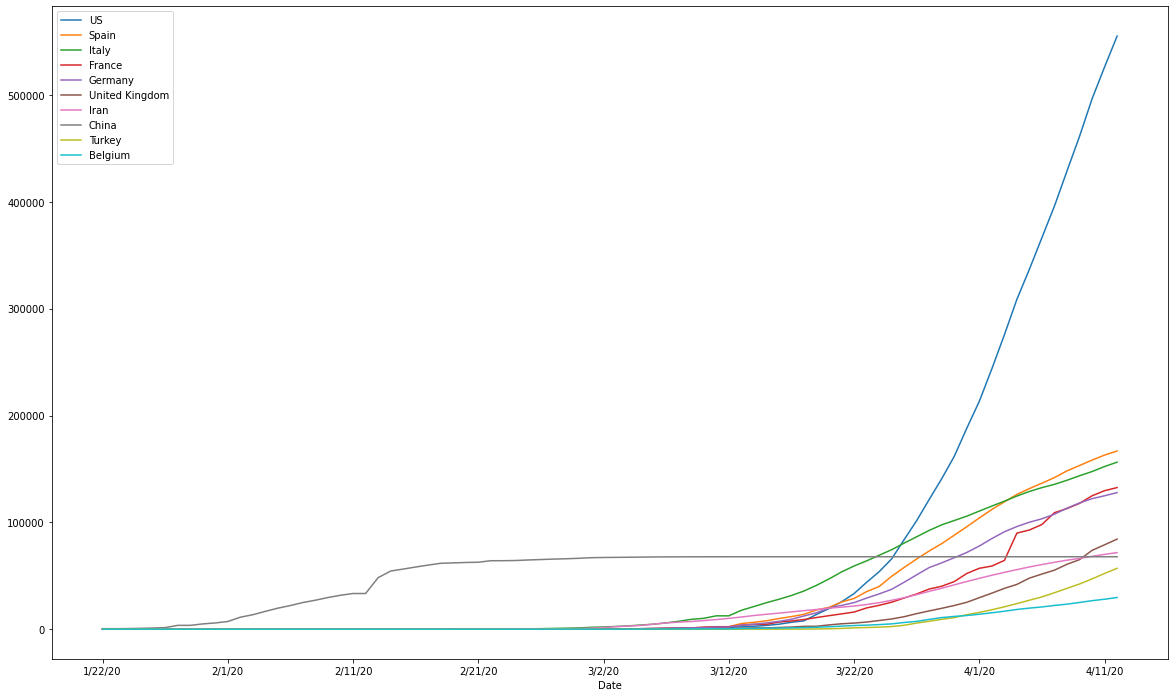

In [6]:
#plot กราฟ Country/Region ผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับ แบบรวม
df1.plot(kind='line',layout=(10,10),figsize=(20,12));

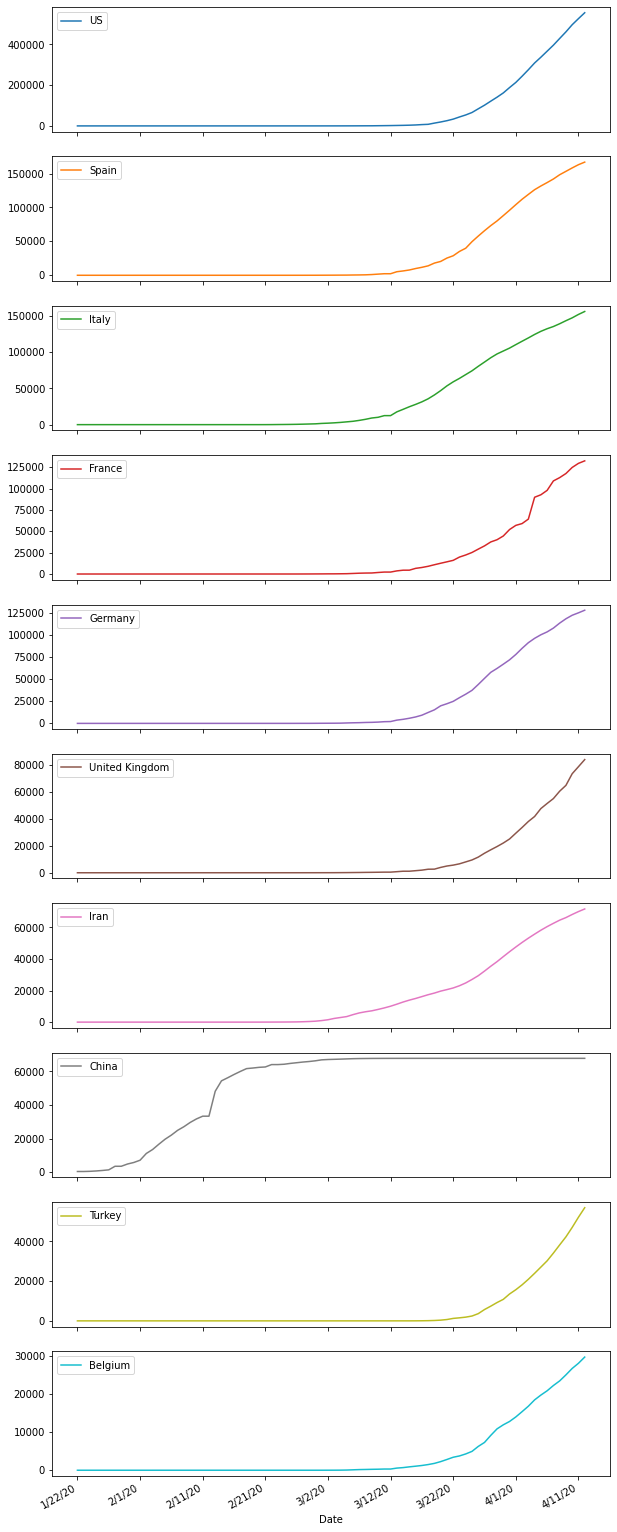

In [5]:
#plot กราฟ Country/Region ผู้ติดเชื้อล่าสุดมากที่สุด 10 อันดับ แยก เรียงตามลำดับมากไปน้อย
df1[['US', 'Spain', 'Italy', 'France', 'Germany','United Kingdom','Iran','China','Turkey','Belgium']].plot(kind='line',subplots = True, figsize=(10,30));

##3.   จงพล็อตกราฟเส้นเพื่อแสดง trend ยอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์(กำหนดให้นับข้อมูลทุกวันอาทิตย์)

In [13]:
#Solution
import pandas as pd
import datetime
import numpy as np

#อ่านไฟล์
confirmed = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_confirmed_global.csv')
confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
confirmed.drop(['Province/State', 'Lat', 'Long'], 1, inplace=True) 
confirmed.groupby('Country').sum()

#หายอดผู้ติดเชื้อในประเทศไทยในแต่ละวัน
confirmed_Thailand = confirmed[confirmed.Country == 'Thailand']
df_Thailand = confirmed_Thailand.T
df_Thailand.columns = ['Thailand']
df1_Thailand =  df_Thailand.T.drop('Country', axis=1).T
df1_Thailand.index.names = ['Date']
df1_Thailand['Date']= df1_Thailand.index

#เปลี่ยนวันที่เพื่อหาวันในสัปดาห์ dayofweek 6 = Sunday
df1_Thailand['Date']= pd.to_datetime(df1_Thailand['Date']) 
df1_Thailand['dayofweek'] = df1_Thailand['Date'].dt.dayofweek
df_Thailand_Sunday = df1_Thailand[df1_Thailand.dayofweek == 6] 
df_Thailand_Sunday

,Thailand,Date,dayofweek
Date,,,
1/26/20,8,2020-01-26,6
2/2/20,19,2020-02-02,6
2/9/20,32,2020-02-09,6
2/16/20,34,2020-02-16,6
2/23/20,35,2020-02-23,6
3/1/20,42,2020-03-01,6
3/8/20,50,2020-03-08,6
3/15/20,114,2020-03-15,6
3/22/20,599,2020-03-22,6


In [14]:
#หายอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์กำหนดให้นับข้อมูลทุกวันอาทิตย์
dplot = df_Thailand_Sunday[['Thailand']]
dplot['Amount each week'] = dplot.diff()
dplot1= dplot[['Amount each week']]
dplot1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Amount each week
Date,
1/26/20,NaN
2/2/20,11
2/9/20,13
2/16/20,2
2/23/20,1
3/1/20,7
3/8/20,8
3/15/20,64
3/22/20,485


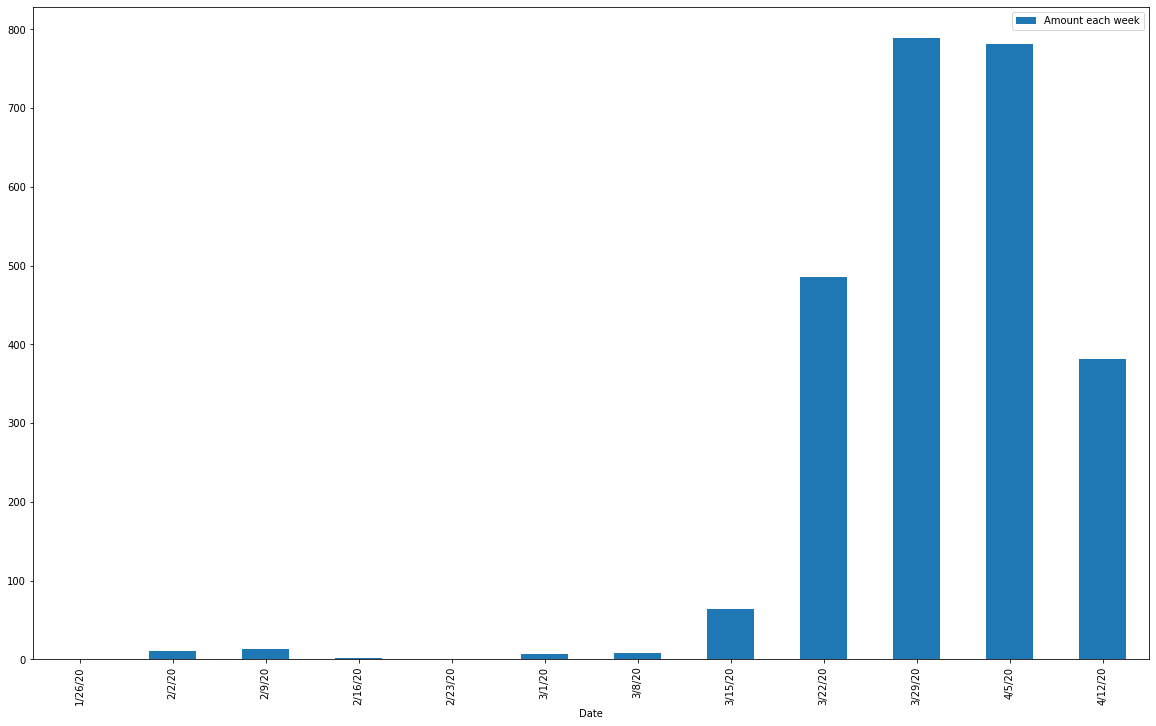

In [15]:
#plot กราฟยอดผู้ติดเชื้อในประเทศไทยในแต่ละสัปดาห์กำหนดให้นับข้อมูลทุกวันอาทิตย์
dplot1.plot(kind='bar',layout=(10,10),figsize=(20,12));

##4.   จงหายอดผู้ติดเชื้อของ**แต่ละวัน**บนเรือไดม่อนพริ้นเซสพร้อมพล็อตกราฟ แล้วระบุวันที่มีการติดเชื้อมากที่สุด

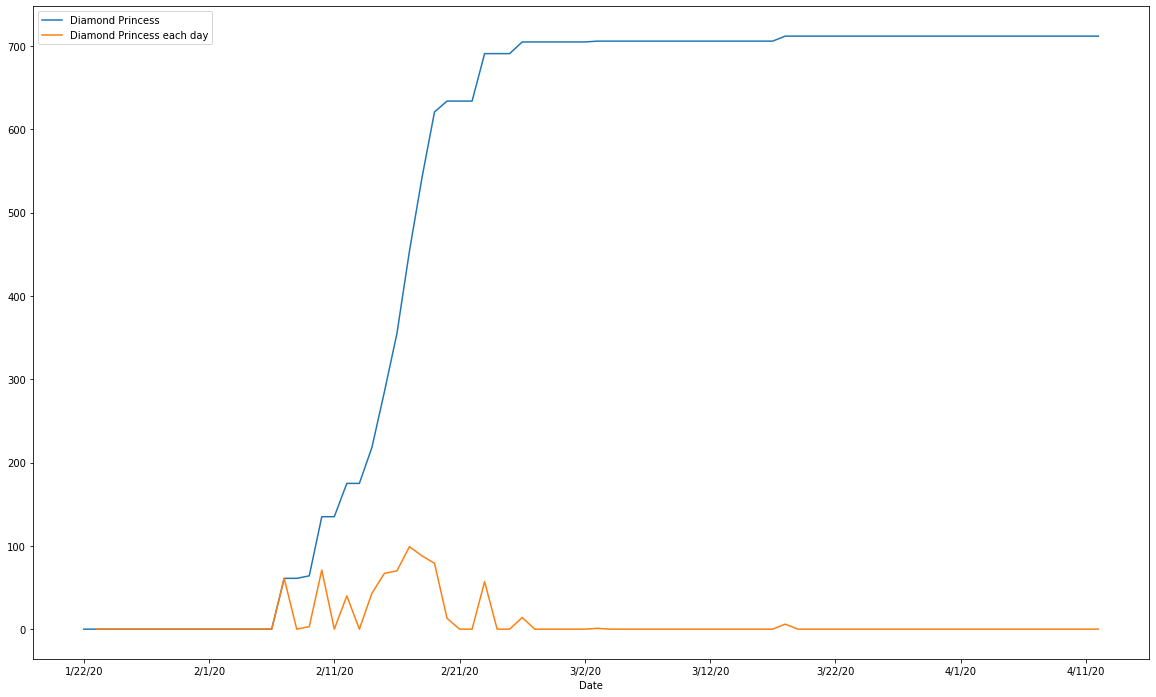

In [16]:
#Solution
import pandas as pd
import datetime
import numpy as np

#อ่านไฟล์
confirmed = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_confirmed_global.csv')
confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
confirmed.drop(['Province/State', 'Lat', 'Long'], 1, inplace=True) 
confirmed.groupby('Country').sum()

#หาจำนวนผู้ติดเชื้อของแต่ละวันบนเรือไดม่อนพริ้นเซส
confirmedDiamondPrincess = confirmed[confirmed.Country == 'Diamond Princess']
dfDiamondPrincess = confirmedDiamondPrincess.T
dfDiamondPrincess.columns = ['Diamond Princess']
df1DiamondPrincess =  dfDiamondPrincess.T.drop('Country', axis=1).T
df1DiamondPrincess.index.names = ['Date']

#หายอดผู้ติดเชื้อรายวัน
df1DiamondPrincess['Diamond Princess each day'] = df1DiamondPrincess.diff()
df1DiamondPrincess.plot(kind='line',layout=(10,10),figsize=(20,12));

#กราฟ Diamond Princess จำนวนผู้ติดเชื้อแบบสะสม ส่วนกราฟ Diamond Princess each day จำนวนผู้ติดเชื้อรายวัน

In [17]:
print("ยอดผู้ติดเชื้อของแต่ละวันบนเรือไดม่อนพริ้นเซส = Diamond Princess each day")
df1DiamondPrincess

ยอดผู้ติดเชื้อของแต่ละวันบนเรือไดม่อนพริ้นเซส = Diamond Princess each day


,Diamond Princess,Diamond Princess each day
Date,,
1/22/20,0,NaN
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
4/8/20,712,0
4/9/20,712,0
4/10/20,712,0


In [19]:
#ระบุวันที่มีการติดเชื้อมากที่สุด บนเรือไดม่อนพริ้นเซส
df1DiamondPrincess['Diamond Princess each day'] = df1DiamondPrincess['Diamond Princess each day'].astype(float)
df1DiamondPrincess['Diamond Princess'] = df1DiamondPrincess['Diamond Princess'].astype(float)
print("วันที่มียอดผู้ติดเชื้อบนเรือไดม่อนพริ้นเซสมากสุด")
df2 = df1DiamondPrincess.nlargest(1,'Diamond Princess each day')
df2['Diamond Princess each day'] 

วันที่มียอดผู้ติดเชื้อบนเรือไดม่อนพริ้นเซสมากสุด


Date
2/17/20    99.0
Name: Diamond Princess each day, dtype: float64

##5.   จงหา Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ พร้อมระบุว่า จาก Country/Region ในกลุ่มดังกล่าว ส่วนใหญ่อยู่ในทวีปอะไร


In [2]:
#Solution
import pandas as pd
import datetime
import numpy as np

#อ่านไฟล์และรวมข้อมูล Country/Region
confirmed = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_confirmed_global.csv')
confirmed.rename(columns={'Province/State':'ProvinceorState' , 'Country/Region':'CountryorRegion'},inplace=True)
c1 = confirmed.groupby(['CountryorRegion']).agg('sum')


deaths = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_deaths_global.csv')
deaths.rename(columns={'Province/State':'ProvinceorState' , 'Country/Region':'CountryorRegion'},inplace=True)
d1 = deaths.groupby(['CountryorRegion']).agg('sum')

#เลือกข้อมูลล่าสุดเพื่อนำมาคำนวณ เปอร์เซ็นต์อัตราการเสียชีวิต
d1['Confirmed_4/12/20'] = c1['4/12/20']
d1.rename(columns={'4/12/20':'Deaths_4/12/20'},inplace=True)

#หาเปอร์เซ็นต์อัตราการเสียชีวิต คอลัมน์ Percentdeath
d2= d1[["Confirmed_4/12/20","Deaths_4/12/20"]]
d2['Percentdeath'] = d2['Deaths_4/12/20'] / d2['Confirmed_4/12/20']  * 100

#หา Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ
d3 = d2.nlargest(20,"Percentdeath")
d3



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Confirmed_4/12/20,Deaths_4/12/20,Percentdeath
CountryorRegion,,,
MS Zaandam,9,2,22.222222
Zimbabwe,14,3,21.428571
Bahamas,46,8,17.391304
Malawi,13,2,15.384615
Algeria,1914,293,15.308255
Belize,14,2,14.285714
Mauritania,7,1,14.285714
Guyana,45,6,13.333333
Italy,156363,19899,12.726156


In [5]:
#ระบุว่า Country/Region ที่ล่าสุดมีเปอร์เซ็นต์อัตราการเสียชีวิตมากที่สุด 20 อันดับ ส่วนใหญ่อยู่ในทวีปอะไร
#installation convert ประเทศ เป็นทวีป
%pip install iso3166
from iso3166 import countries
%pip install pycountry-convert
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_continent(d3):
    try:
        d3['code'] =  country_name_to_country_alpha2(d3.index['CountryorRegion'])
    except:
        d3['code'] = 'Unknown' 
    try:
        d3['continent'] = country_alpha2_to_continent_code(d3['code'])
    except:
        d3['continent'] = 'Unknown' 
    return d3
get_continent(d3)

#run ไม่ผ่านครับ ขึ้น unknown

,Confirmed_4/12/20,Deaths_4/12/20,Percentdeath,code,continent
CountryorRegion,,,,,
MS Zaandam,9,2,22.222222,Unknown,Unknown
Zimbabwe,14,3,21.428571,Unknown,Unknown
Bahamas,46,8,17.391304,Unknown,Unknown
Malawi,13,2,15.384615,Unknown,Unknown
Algeria,1914,293,15.308255,Unknown,Unknown
Belize,14,2,14.285714,Unknown,Unknown
Mauritania,7,1,14.285714,Unknown,Unknown
Guyana,45,6,13.333333,Unknown,Unknown
Italy,156363,19899,12.726156,Unknown,Unknown


##6.   จงหายอดผู้ป่วยที่กำลังรักษาตัวล่าสุด (สมมติว่ายังไม่เสียชีวิตหรือหายดี) ของแต่ละ Province/State ในประเทศจีน พร้อมพล็อตกราฟแสดงจำนวนในแต่ละ Province/State

In [5]:
#Solution
import pandas as pd
import datetime
import numpy as np

#นำเข้าไฟล์และหายอดผู้ป่วยที่กำลังรักษาตัวล่าสุด (สมมติว่ายังไม่เสียชีวิตหรือหายดี) ของแต่ละ Province/State ในประเทศจีน 
confirmed = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_confirmed_global.csv')
confirmed.rename(columns={'Province/State':'ProvinceorState' , 'Country/Region':'CountryorRegion'},inplace=True)
confirmedChina = confirmed[confirmed.CountryorRegion == 'China']
c1 = confirmedChina.groupby(['ProvinceorState','CountryorRegion']).agg('sum')


recovered = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_recovered_global.csv')
recovered.rename(columns={'Province/State':'ProvinceorState' , 'Country/Region':'CountryorRegion'},inplace=True)
recoveredChina = recovered[recovered.CountryorRegion == 'China']
r1 = recoveredChina.groupby(['ProvinceorState','CountryorRegion']).agg('sum')


deaths = pd.read_csv('https://github.com/tsuwannasin13/Covid-19/raw/master/time_series_covid19_deaths_global.csv')
deaths.rename(columns={'Province/State':'ProvinceorState' , 'Country/Region':'CountryorRegion'},inplace=True)
deathsChina = deaths[deaths.CountryorRegion == 'China']
d1 = deathsChina.groupby(['ProvinceorState','CountryorRegion']).agg('sum')

c1['Recovery_4/12/20'] = r1['4/12/20']
c1['Deaths_4/12/20'] = d1['4/12/20']

#ยอดผู้ป่วยที่กำลังรักษาตัวล่าสุด = confirm acc 4/12/20 - recoverd acc 4/12/20 - death acc 4/12/20 
c1.rename(columns={'4/12/20':'Confirmed_4/12/20'},inplace=True)
c1['Treat_4/12/20'] = c1['Confirmed_4/12/20']-c1['Recovery_4/12/20']-c1['Deaths_4/12/20']

#แสดงผล
c2= c1[["Confirmed_4/12/20", "Recovery_4/12/20","Deaths_4/12/20","Treat_4/12/20"]]
c2

,,Confirmed_4/12/20,Recovery_4/12/20,Deaths_4/12/20,Treat_4/12/20
ProvinceorState,CountryorRegion,,,,
Anhui,China,991,984,6,1
Beijing,China,589,479,8,102
Chongqing,China,579,570,6,3
Fujian,China,352,321,1,30
Gansu,China,139,135,2,2
Guangdong,China,1552,1443,8,101
Guangxi,China,254,252,2,0
Guizhou,China,146,144,2,0
Hainan,China,168,162,6,0


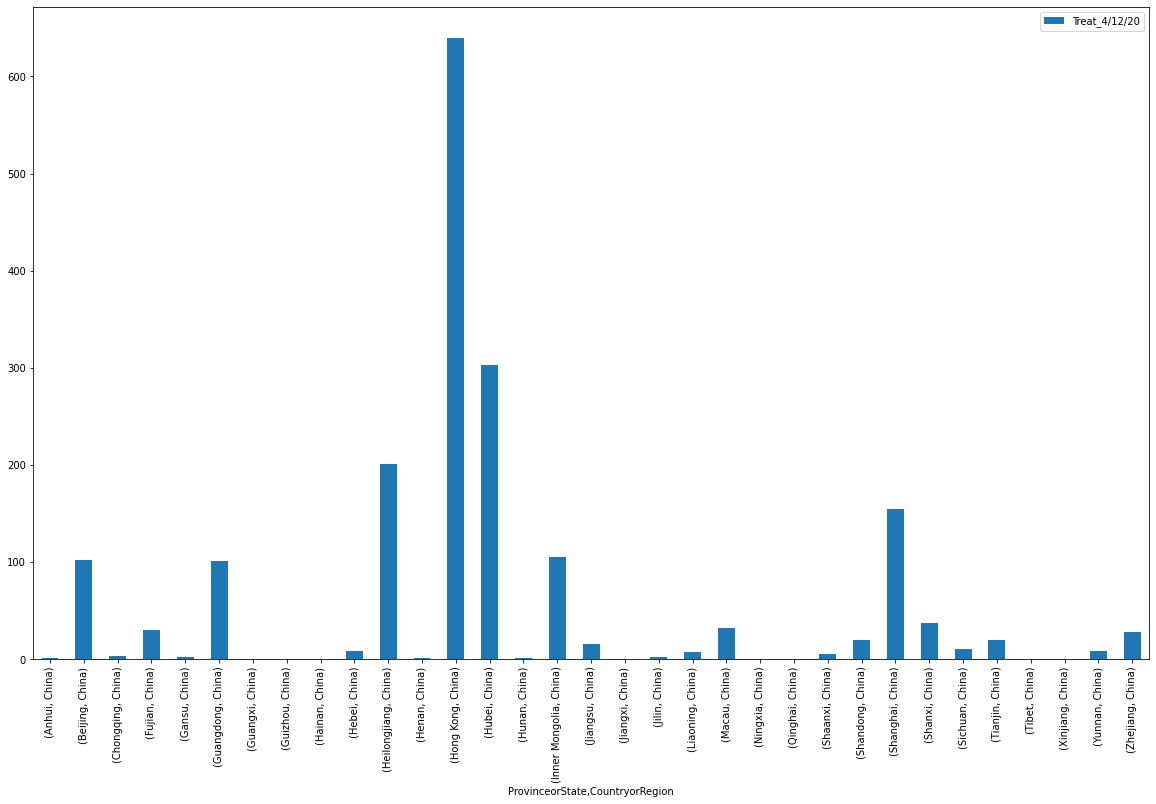

In [4]:
#พล็อตกราฟแสดงจำนวนผู้ป่วยที่กำลังรักษาตัวล่าสุดของแต่ละ Province/State ในประเทศจีน
treat =c2[["Treat_4/12/20"]]
treat.plot(kind='bar',layout=(10,10),figsize=(20,12));